# Working with large data set

In this workshop, we will use real data imported from csv file (boston.csv) instead of made-up ones

In [132]:
# import everything we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [133]:
''' 
Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's
 '''

" \nVariables in order:\n CRIM     per capita crime rate by town\n ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n INDUS    proportion of non-retail business acres per town\n CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n NOX      nitric oxides concentration (parts per 10 million)\n RM       average number of rooms per dwelling\n AGE      proportion of owner-occupied units built prior to 1940\n DIS      weighted distances to five Boston employment centres\n RAD      index of accessibility to radial highways\n TAX      full-value property-tax rate per $10,000\n PTRATIO  pupil-teacher ratio by town\n B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\n LSTAT    % lower status of the population\n MEDV     Median value of owner-occupied homes in $1000's\n "

### Construct a dataframe for our data and target for a better illustration
### set the columns names according to the result above and show the first 5 rows

In [134]:
# Construct a dataframe for our data and target for a better illustration
# set the columns names according to the result above
df = pd.read_csv("boston.csv", index_col=0)
df.head()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Model Training

In [135]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [136]:
# notice that we need double square brackets to select X
# inner bracket is a list
# outer bracker accesses a subset of the original DataFrame

#can also use
#features = df[["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]]
#label = df["MEDV"]
features = df.drop("MEDV", axis=1)
label = df["MEDV"]
x_train,x_test,y_train,y_test = train_test_split(features,label,test_size=0.1,random_state=42)


In [137]:
# We need 2D arrays for x_train 
print(x_train.shape)
print(x_test.shape)
x_train.head()


(455, 13)
(51, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
281,0.03705,20.0,3.33,0.0,0.4429,6.968,37.2,5.2447,5.0,216.0,14.9,392.23,4.59
22,1.23247,0.0,8.14,0.0,0.5380,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
101,0.11432,0.0,8.56,0.0,0.5200,6.781,71.3,2.8561,5.0,384.0,20.9,395.58,7.67
268,0.54050,20.0,3.97,0.0,0.5750,7.470,52.6,2.8720,5.0,264.0,13.0,390.30,3.16
485,3.67367,0.0,18.10,0.0,0.5830,6.312,51.9,3.9917,24.0,666.0,20.2,388.62,10.58


In [138]:
# instantiate a linear regression model
# train the model to fit the training data, finding the coef and intercept

linReg = linear_model.LinearRegression()
linReg.fit(x_train,y_train)

print("Intercept: ",linReg.intercept_)

feature_col=x_train.columns
coefficients=linReg.coef_

coef_series=pd.Series(coefficients,index=feature_col)

print(f"Coef_Series:\n{coef_series}")

Intercept:  36.73146277462427
Coef_Series:
CRIM       -0.119886
ZN          0.039913
INDUS       0.021294
CHAS        2.775652
NOX       -18.585496
RM          3.755792
AGE         0.004571
DIS        -1.470646
RAD         0.311878
TAX        -0.011811
PTRATIO    -0.947556
B           0.010329
LSTAT      -0.550096
dtype: float64


# Prediction

Now that we've trained our model, the next step is to predict the data.

Steps:

    Get predictions, 𝑦̂, using LinearRegression.predict()


In [139]:
y_pred = linReg.predict(x_test)
print(x_test.head())
y_pred

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
173  0.09178   0.0   4.05   0.0  0.510  6.416  84.1  2.6463   5.0  296.0   
274  0.05644  40.0   6.41   1.0  0.447  6.758  32.9  4.0776   4.0  254.0   
491  0.10574   0.0  27.74   0.0  0.609  5.983  98.8  1.8681   4.0  711.0   
72   0.09164   0.0  10.81   0.0  0.413  6.065   7.8  5.2873   4.0  305.0   
452  5.09017   0.0  18.10   0.0  0.713  6.297  91.8  2.3682  24.0  666.0   

     PTRATIO       B  LSTAT  
173     16.6  395.50   9.04  
274     17.6  396.90   3.53  
491     20.1  390.11  18.07  
72      19.2  390.91   5.52  
452     20.2  385.09  17.27  


array([29.3639579 , 36.18916482, 14.05923305, 24.76681233, 18.79788306,
       23.24853399, 17.67925163, 13.52689687, 23.47852891, 20.64157306,
       25.09931716, 18.95745403, -5.20884417, 21.49578209, 19.70582791,
       25.88188533, 20.58810146,  6.32255133, 40.53496182, 17.70625559,
       27.18358564, 30.26489811, 11.44273418, 23.67928093, 18.3134012 ,
       16.68382624, 22.70408601, 15.00807515, 22.63999482, 19.26595697,
       23.18874623, 25.13865453, 25.45744382, 18.65563   , 17.14694386,
       17.09774591, 30.86149933, 20.30925718, 23.6643961 , 24.16999127,
       14.02229608, 32.76422241, 42.75995463, 17.52640822, 27.33820148,
       17.4795262 , 14.37833428, 25.34949499, 20.51753419, 30.15497476,
       21.71831626])

# Model Validation

We want to see how well our model fits the data. r2-score should be as close to 1 as possible

In [140]:
# we can see the coefficient and intercept our model finds
print("Intercept: ",linReg.intercept_)

feature_col=x_train.columns
coefficients=linReg.coef_

coef_series=pd.Series(coefficients,index=feature_col)

print(f"Coef_Series:\n{coef_series}")

print("score: ",linReg.score(x_test,y_test))

Intercept:  36.73146277462427
Coef_Series:
CRIM       -0.119886
ZN          0.039913
INDUS       0.021294
CHAS        2.775652
NOX       -18.585496
RM          3.755792
AGE         0.004571
DIS        -1.470646
RAD         0.311878
TAX        -0.011811
PTRATIO    -0.947556
B           0.010329
LSTAT      -0.550096
dtype: float64
score:  0.7598135533532492


As the r2-score isn't very close to 1, our linear regression model doesn't really fit the data well
We can visualize it to see what the model looks like

In [141]:
import seaborn as sns
%matplotlib inline

Plot the regression line (blue) vs the actual value (red)

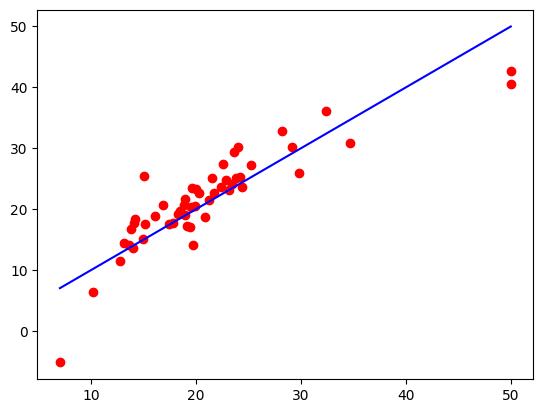

In [142]:
# We want to plot the regression line(blue) vs the actual value(red)
plt.scatter(y_test,y_pred,color="red",label="Predicted Value")

min_y=np.min(y_test)
max_y=np.max(y_test)

plt.plot([min_y,max_y],[min_y,max_y],color="blue")

